In [ ]:
# 컨볼루션 신경망 설계 드롭아웃을 적용해서 유연한 구조로 변경
# c p c p c fc d fc     c c p fc fc
#
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# load dataset
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# 차수 변경 & 표준화
x_train = x_train.reshape(-1,28,28,1).astype(np.float32)/255.0
x_test = x_test.reshape(-1,28,28,1).astype(np.float32)/255.0

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# c-c-p-fc-fc 구조
# convolution-convolution-pooling
# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(5,5), padding = 'same', activation='relu',input_shape = (28,28,1)))
cnn.add(Conv2D(64,(5,5), padding = 'same', activation='relu',input_shape = (28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
# 학습
cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
hist = cnn.fit(x_train,y_train, batch_size=128, epochs = 30, validation_data=(x_test,y_test), verbose = 2)

Epoch 1/30
469/469 - 16s - loss: 0.1849 - accuracy: 0.9435 - val_loss: 0.0407 - val_accuracy: 0.9870 - 16s/epoch - 34ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0339 - val_accuracy: 0.9884 - 4s/epoch - 9ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0310 - val_accuracy: 0.9897 - 4s/epoch - 10ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0280 - val_accuracy: 0.9909 - 4s/epoch - 9ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0260 - val_accuracy: 0.9908 - 4s/epoch - 9ms/step
Epoch 6/30
469/469 - 4s - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0270 - val_accuracy: 0.9910 - 4s/epoch - 9ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0327 - val_accuracy: 0.9905 - 4s/epoch - 9ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0244 - val_accuracy: 0.9926 - 4s/epoch - 9ms/step
Epoch 9/30
469/469 -

In [ ]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test)
res

313/313 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9921


[0.03460012748837471, 0.9921000003814697]

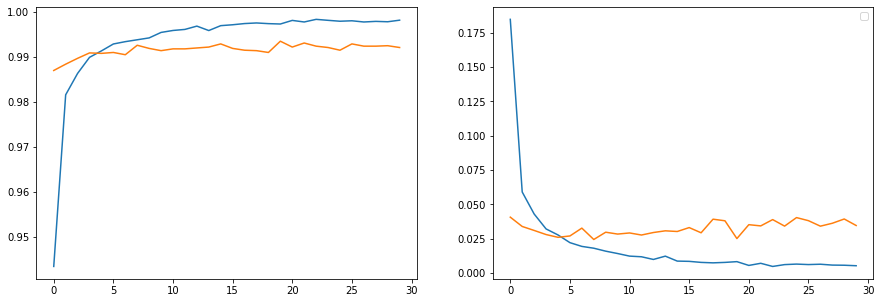

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.lineplot(data = hist.history['accuracy'], ax=ax[0])
sns.lineplot(data = hist.history['val_accuracy'], ax=ax[0])
plt.legend(['accuracy', 'val_accuracy'])
sns.lineplot(data = hist.history['loss'], ax=ax[1])
sns.lineplot(data = hist.history['val_loss'], ax=ax[1])


In [ ]:
# 텐서플로에서 중요한 클래스 4
# model
# layers
# loss
# optimizer

In [ ]:
# functional API 함수
# 텐서가 흐르다가 중간에 여러재고 갈라지는 경우(출력이 여러개)
# 시계열이나 생성모델에서 종종 발생
